## Plot Buoy Tracks Using Ocean Parcels Output

In [39]:
%matplotlib inline
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

Open up ocean parcels particle netcdf file

In [40]:
fname = "Output.nc"
pfile = netCDF4.Dataset(fname)

Grab information of interest from particle netcdf file

In [41]:
lon = np.ma.filled(pfile.variables['lon'], np.nan)
lat = np.ma.filled(pfile.variables['lat'], np.nan)
time = np.ma.filled(pfile.variables['time'], np.nan)
z = np.ma.filled(pfile.variables['z'], np.nan)
mesh = pfile.getncattr('parcels_mesh') if 'parcels_mesh' in pfile.getncattr('parcels_mesh') else 'spherical'
pfile.close()
lons = (lon + 180)%360 - 180   ##- Format longitudes -180 to +180

Set up figure/plotting params

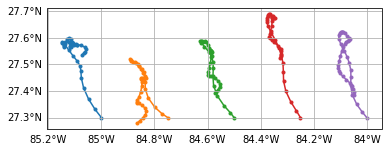

In [42]:
spherical = True;
central_longitude = np.mean(lon)
projection = ccrs.PlateCarree(None);
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
gl = ax.gridlines(crs=projection, draw_labels=True)
gl.top_labels, gl.right_labels = (False, False)
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
ax.grid()
ax.plot(np.transpose(lons), np.transpose(lat), '.-', transform=cartopy.crs.Geodetic());

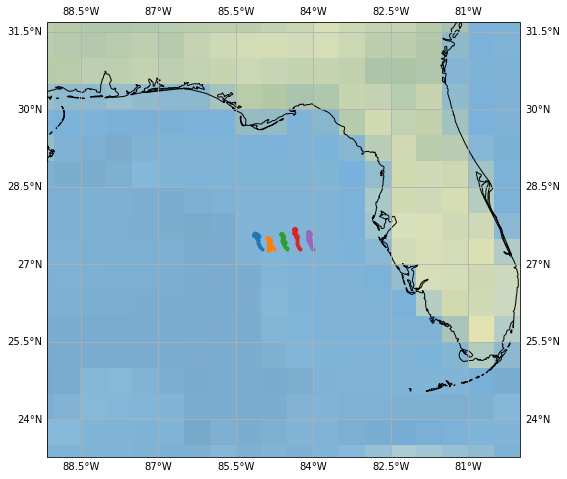

In [59]:
spherical = True;
buff = 4
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.plot(np.transpose(lons), np.transpose(lat), '.-');
ax.coastlines()
ax.set_extent([np.min(lons)-buff, np.max(lons)+buff, np.min(lat)-buff, np.max(lat)+buff], crs=ccrs.PlateCarree())
gl = ax.gridlines(crs=projection, draw_labels=True)
ax.grid()
plt.show()